# Issues and notes
* Have to rewrite data access script
* Rows are *not* deleted from `cx_translations` when the translation drafts are purged

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from wmfdata import charting, mariadb, hive
from wmfdata.utils import pd_display_all

charting.set_mpl_style()

In [22]:
MWH_SNAPSHOT = "2019-01"

# Surviving translations by newcomers

In [116]:
hive.run("""
select
    date_format(event_timestamp, "YYYY-MM") as month,
    if(array_contains(rtc.tags, "contenttranslation-v2"), 2, 1) as cx_version,
    -- 6 months ≈ 26 weeks = 252 days
    event_user_text,
    event_timestamp,
    ssac.dt,
    if(
        coalesce(datediff(event_timestamp, ssac.dt) > 252, true),
        "experienced",
        "new"
    ) as user_experience,
    if(revision_is_deleted, "deleted", "surving") as status
from event.mediawiki_revision_tags_change rtc -- First full month of data is 2018-09
inner join wmf.mediawiki_history mh
on
    mh.snapshot = "{mwh_snapshot}" and
    mh.event_timestamp >= "2018-09" and
    rtc.rev_id = mh.revision_id and
    `rtc`.`database` = mh.wiki_db
left join event_sanitized.serversideaccountcreation ssac
on
    ssac.event.username = rtc.performer.user_text and
    ssac.year >= 0
where
    event_entity = "revision" and
    event_type = "create" and
    array_contains(rtc.tags, "contenttranslation") and
    ((rtc.year = 2018 and rtc.month >= 9) or rtc.year = 2019)
""".format(
    mwh_snapshot=MWH_SNAPSHOT
))

,month,cx_version,event_user_text,event_timestamp,dt,user_experience,status
0,2018-10,1,(।जय महलवाल।),2018-10-31 13:59:49.0,2018-10-01T11:53:37Z,new,surving
1,2018-10,1,(।जय महलवाल।),2018-10-18 07:25:28.0,2018-10-01T11:53:37Z,new,surving
2,2018-10,1,(।जय महलवाल।),2018-10-08 13:51:03.0,2018-10-01T11:53:37Z,new,surving
3,2018-10,1,(।जय महलवाल।),2018-10-06 13:37:00.0,2018-10-01T11:53:37Z,new,surving
4,2019-01,2,00matt00,2019-01-29 00:54:26.0,None,experienced,surving
5,2018-11,1,00matt00,2018-11-07 17:34:50.0,None,experienced,surving
6,2018-11,1,00matt00,2018-11-05 18:50:38.0,None,experienced,surving
7,2018-12,1,103ful6,2018-12-09 05:13:46.0,None,experienced,surving
8,2019-01,2,103ful6,2019-01-31 16:01:14.0,None,experienced,surving
9,2019-01,2,103ful6,2019-01-26 10:32:05.0,None,experienced,surving


In [123]:
_116.groupby(["month", "user_experience"]).agg({
    "event_timestamp": "count",
    "event_user_text": "nunique"
}).rename(columns={
    "event_timestamp": "translations",
    "event_user_text": "translators"
}).unstack()

translations       translators      
user_experience  experienced   new experienced   new
month                                               
2018-09                 9648  2183        1367   666
2018-10                10053  2849        1435   827
2018-11                 8630  3243        1494  1014
2018-12                 7569  2910        1364   867
2019-01                10840  3460        1660   991
2019-12                  524   168         196    74

In [111]:
# Censoring based on varying time to deletion? Minimum time-to-deletion filter?
translation_deletion_r = hive.run("""
select
    month, 
    cx_version,
    user_experience,
    status,
    count(*) as translations
from (
    select
        date_format(event_timestamp, "YYYY-MM") as month,
        if(array_contains(rtc.tags, "contenttranslation-v2"), 2, 1) as cx_version,
        -- 6 months ≈ 26 weeks = 252 days
        if(
            coalesce(datediff(event_timestamp, ssac.dt) > 252, true),
            "experienced",
            "new"
        ) as user_experience,
        if(revision_is_deleted, "deleted", "surving") as status
    from event.mediawiki_revision_tags_change rtc -- First full month of data is 2018-09
    inner join wmf.mediawiki_history mh
    on
        mh.snapshot = "{mwh_snapshot}" and
        mh.event_timestamp >= "2018-09" and
        rtc.rev_id = mh.revision_id and
        `rtc`.`database` = mh.wiki_db
    left join event_sanitized.serversideaccountcreation ssac
    on
        ssac.event.username = rtc.performer.user_text and
        ssac.year >= 0
    where
        event_entity = "revision" and
        event_type = "create" and
        array_contains(rtc.tags, "contenttranslation") and
        ((rtc.year = 2018 and rtc.month >= 9) or rtc.year = 2019)
) translations
group by 
    month, 
    cx_version,
    user_experience,
    status
""".format(
    mwh_snapshot=MWH_SNAPSHOT
))

In [112]:
(translation_deletion_cx1
.drop(["cx_version"], axis=1)
.assign(month=lambda df: pd.to_datetime(df["month"]))
.set_index(["month", "user_experience", "status"])
.unstack()
.reset_index("user_experience")
)

user_experience translations        
status                          deleted surving
month                                          
2018-09-01     experienced            8      93
2018-09-01             new          408    1751
2018-10-01     experienced           51     172
2018-10-01             new          619    2075
2018-11-01     experienced           84     339
2018-11-01             new          566    2322
2018-12-01     experienced           79     194
2018-12-01             new          371    1626
2019-01-01     experienced           12     212
2019-01-01             new          192     598
2019-12-01     experienced            2       7
2019-12-01             new           13      35

In [124]:
translation_deletion_r

,month,cx_version,user_experience,status,translations
0,2018-09,1,experienced,deleted,468
1,2018-09,1,experienced,surving,8991
2,2018-09,1,new,deleted,408
3,2018-09,1,new,surving,1751
4,2018-09,2,experienced,deleted,2
5,2018-09,2,experienced,surving,187
6,2018-09,2,new,deleted,1
7,2018-09,2,new,surving,23
8,2018-10,1,experienced,deleted,498
9,2018-10,1,experienced,surving,8687


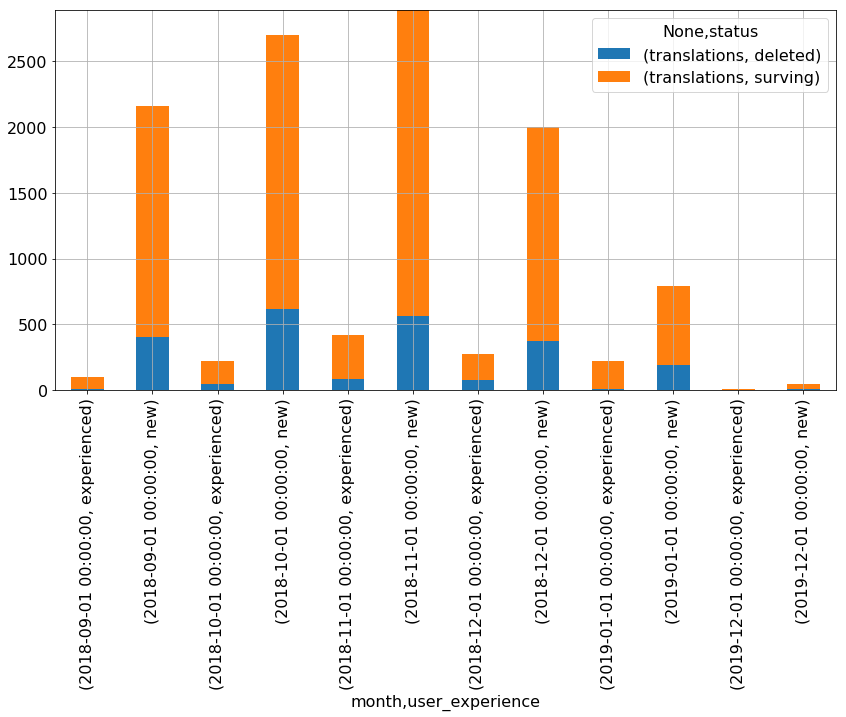

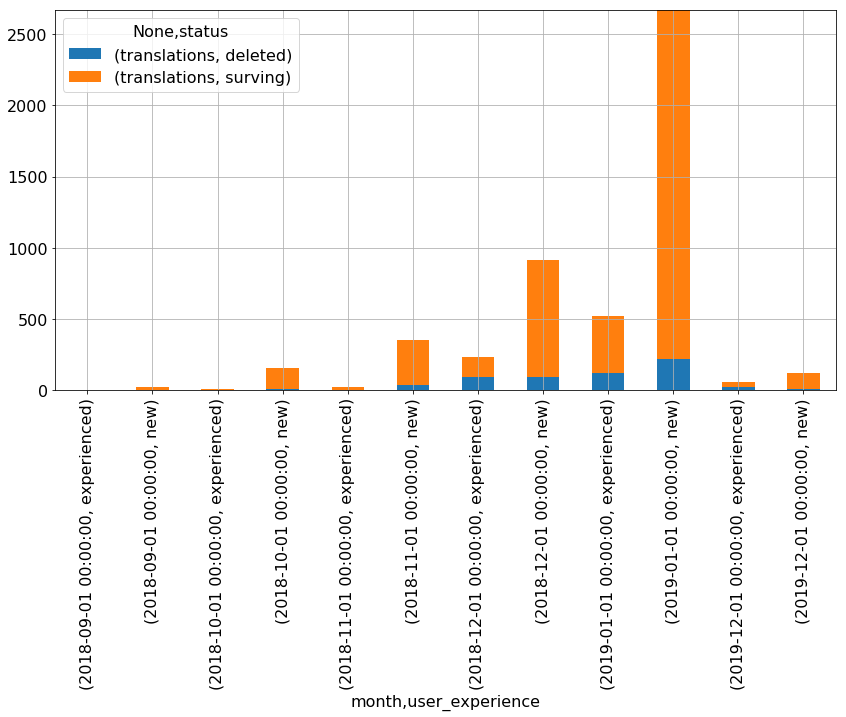

In [98]:
translation_deletion_cx1 = translation_deletion_r.query("cx_version == 1")
translation_deletion_cx2 = translation_deletion_r.query("cx_version == 2")

dfs = [translation_deletion_cx1, translation_deletion_cx2]

for df in dfs:
    (df
    .drop(["cx_version"], axis=1)
    .assign(month=lambda df: pd.to_datetime(df["month"]))
    .set_index(["month", "user_experience", "status"])
    .unstack()
    .plot.bar(
        stacked=True
    ))


# Translators

In [67]:
translators = mariadb.run("""
select
    month,
    cx_version,
    user_experience,
    count(distinct user_name) as users_starting_translations
from (
    select
        date_format(str_to_date(translation_start_timestamp, "%Y%m%d%H%i%S"), "%Y-%m") as month,
        translation_cx_version as cx_version,
        if(
            datediff(
                str_to_date(translation_start_timestamp, "%Y%m%d%H%i%S"),
                -- For old accounts, this is when the user account was centralized, but since we're looking
                -- post-2017 only, the distiction doesn't matter
                str_to_date(gu_registration, "%Y%m%d%H%i%S")
            ) > 252,
            "experienced",
            "new"
        ) as user_experience,
        gu_name as user_name
    from
        wikishared.cx_translations
    left join
        centralauth.globaluser
    on gu_id = translation_started_by
    where 
        translation_start_timestamp > "2018"
) translators
group by
    month,
    cx_version,
    user_experience
""")

In [68]:
translators.head()

,month,cx_version,user_experience,users_starting_translations
0,2018-01,1,experienced,2261
1,2018-01,1,new,1275
2,2018-01,2,experienced,3
3,2018-01,2,new,1
4,2018-02,1,experienced,2017


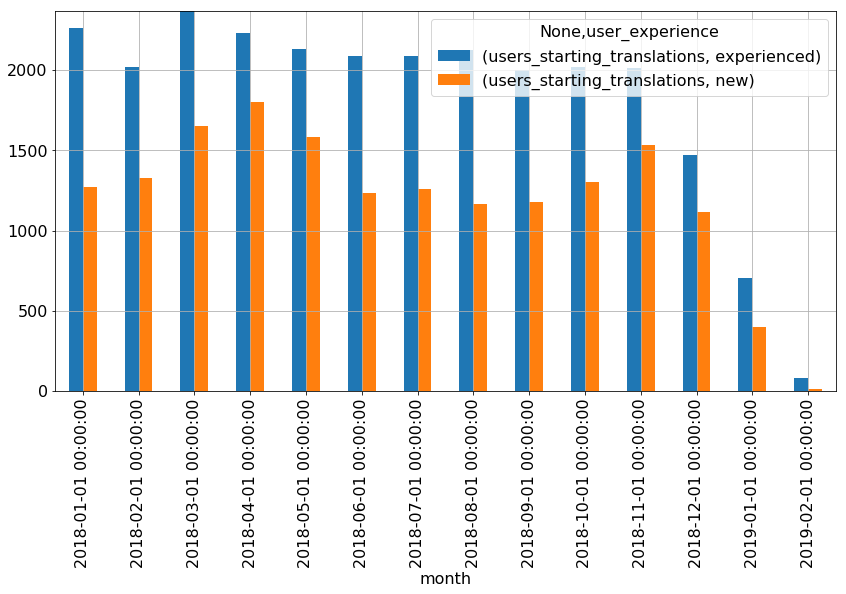

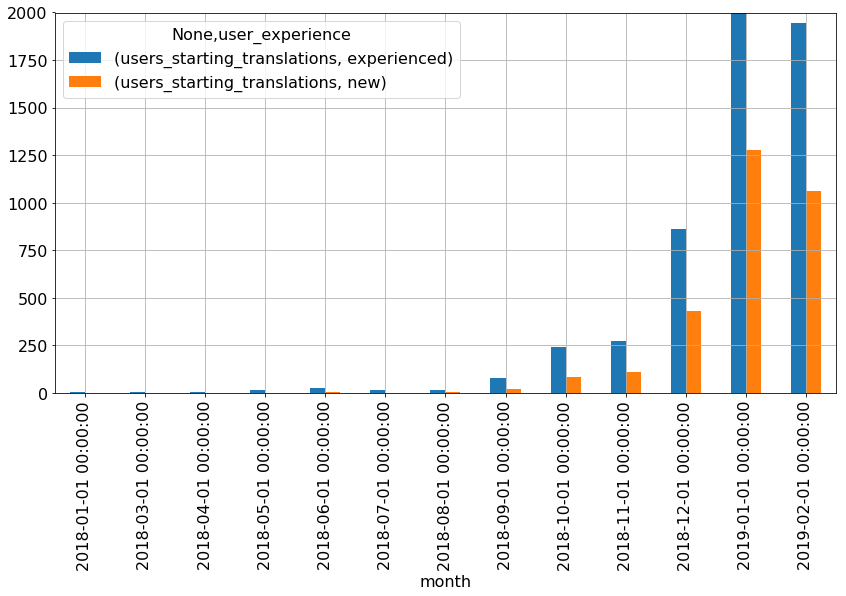

In [71]:
translators_cx1 = translators.query("cx_version == 1")
translators_cx2 = translators.query("cx_version == 2")

dfs = [translators_cx1, translators_cx2]

for df in dfs:
    (
        df
        .drop(["cx_version"], axis=1)
        .assign(month=lambda df: pd.to_datetime(df["month"]))
        .set_index(["month", "user_experience"])
        .unstack()
        .plot.bar()
    )

# Publication rate

The "token" in CX event logging is the user name... 😛

In [ ]:
mariadb.run("""
select
    date_format(str_to_date(translation_start_timestamp, "%Y%m%d%H%i%S"), "%Y-%m") as month,

wikishared.cx_translation


""")

Have to query the cx_translation table, get the output, and upload it to Hive so I can combine it with publishing failure data from event_logging.

In [ ]:
hive.run("drop table neilpquinn.cx_translators")

In [ ]:
path = "data/cx_translators.csv"
translators.to_csv(path)
hive.load_csv(
    path,
    field_spec="start_month string, user_name string, cx_version int",
    db_name = "neilpquinn",
    table_name="cx_translators"
)

In [ ]:
translators_stats = """


"""